<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - SVM
    <br>
<font color=black size=4>
    Alireza Gargoori Motlagh, Alireza Heidari
    
<br><br>
<font size=4>
   **Name**: Yalda Shabanzadeh<br>
   **Student ID**: 98101822 <br> <br>
In this homework, we are going to implement the algorithms from the second and third chapters of the course, so reading the notebooks of these chapters would be quite useful. Also, we are going to evaulate and compare our models by the metrics defined in chapter 3. Keep in mind to complete all of the following questions and write your own codes in the TODO parts.

## <font face="Times New Roman" size=4><div dir=ltr>
## Problem 3: Face Classification by SVM on Eigenfaces (150 points)
In the following problem, we are going to build a classifier to distinguish the faces of 40 people on a toy dataset. The dataset includes 400 pictures of 40 people faces, each by a 64*64 pixel picture. Use the following cell to download the dataset:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
print(faces.images[0].shape)

(400, 4096)
(64, 64)


<font face="Times New Roman" size=4><div dir=ltr>
### Visualization of the Faces (5 points)
Plot an image of each class in one figure using subplots. (Note that the design matrix X is availabe in <code>faces.data</code> and the target values available in <code>faces.target</code> .)

In [3]:
classes = np.unique(faces.target)
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [4]:
# get a random indice for each class

random_indices = list()
for cls in classes:
    choices = np.where(faces.target == cls)[0]
    random_indices.append(np.random.choice(choices, 1))

In [5]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """
    Helper function to plot a gallery of portraits
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

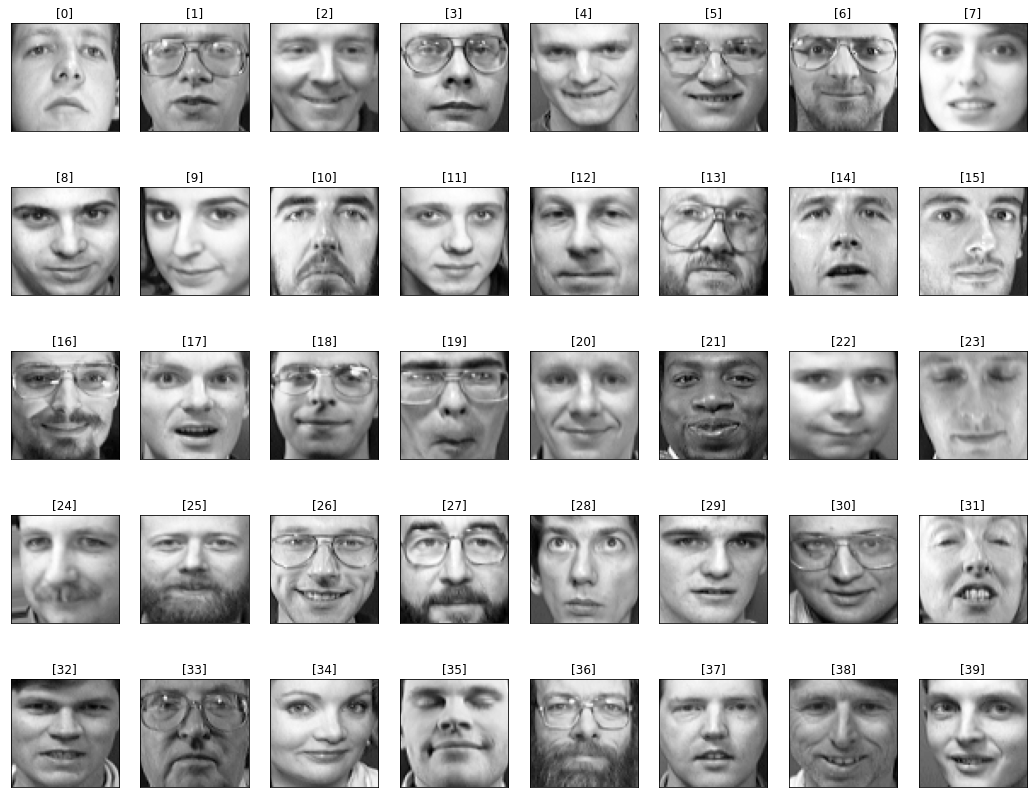

In [6]:
n_samples, h, w = faces.images.shape
random_faces = faces.data[random_indices]
random_target = faces.target[random_indices]

plot_gallery(random_faces, random_target, h, w, n_row=5, n_col=8)

<font face="Times New Roman" size=4><div dir=ltr>
### Train-Test Split (2 points)
Split the data into train and test sets and print the dimensions of each set. (70% for train and 30% for test)

In [7]:
X = faces.data
y = faces.target

In [8]:
from sklearn.model_selection import train_test_split

rand_indices = np.arange(len(X))
np.random.shuffle(rand_indices)
X = X[rand_indices]
y = y[rand_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

print(
    f'X_train shape: {X_train.shape}',
    f'X_test shape: {X_test.shape}',
    f'y_train shape: {y_train.shape}',
    f'y_test shape: {y_test.shape}',
    sep='\n'
)

X_train shape: (280, 4096)
X_test shape: (120, 4096)
y_train shape: (280,)
y_test shape: (120,)


<font face="Times New Roman" size=4><div dir=ltr>
### Dimensionality Reduction (18 points)
As you might have guessed, the number of featuers, i.e. pixels, is quite large and training a classifier might take a considerbale time. However, using a wise method to reduce the dimension of our data could decrease the cost of training the model. In the following cell use PCA (Principal Component Analysis) to reduce the dimension of the dataset. Choose an appropirate number of components in your PCA and explain your reason for your choice.

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
n_samples, h, w = faces.images.shape
n_features = X.shape[1]
n_classes = len(np.unique(y))

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 400
n_features: 4096
n_classes: 40


In [12]:
ratio = 0.95 # pick as many components till it reaches 95% variance ratio

pca = PCA(n_components=ratio).fit(X_train)
X_pca = pca.transform(X_train)

n_components = pca.explained_variance_ratio_.shape[0]
print(f"Number of components: {n_components}")

Number of components: 103


> We should pick n_components such that the comulative variance reaches 95% cut-off threshold.

<font face="Times New Roman" size=4><div dir=ltr>
Plot the scree plot of the proportion of the variance explained(PVE) vs principal components to determine the number of principal components for futher analysis.

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def scree_plot(pca):
    values = np.arange(pca.n_components_) + 1
    plt.figure(figsize=(25, 10))
    plt.plot(
        values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.show()

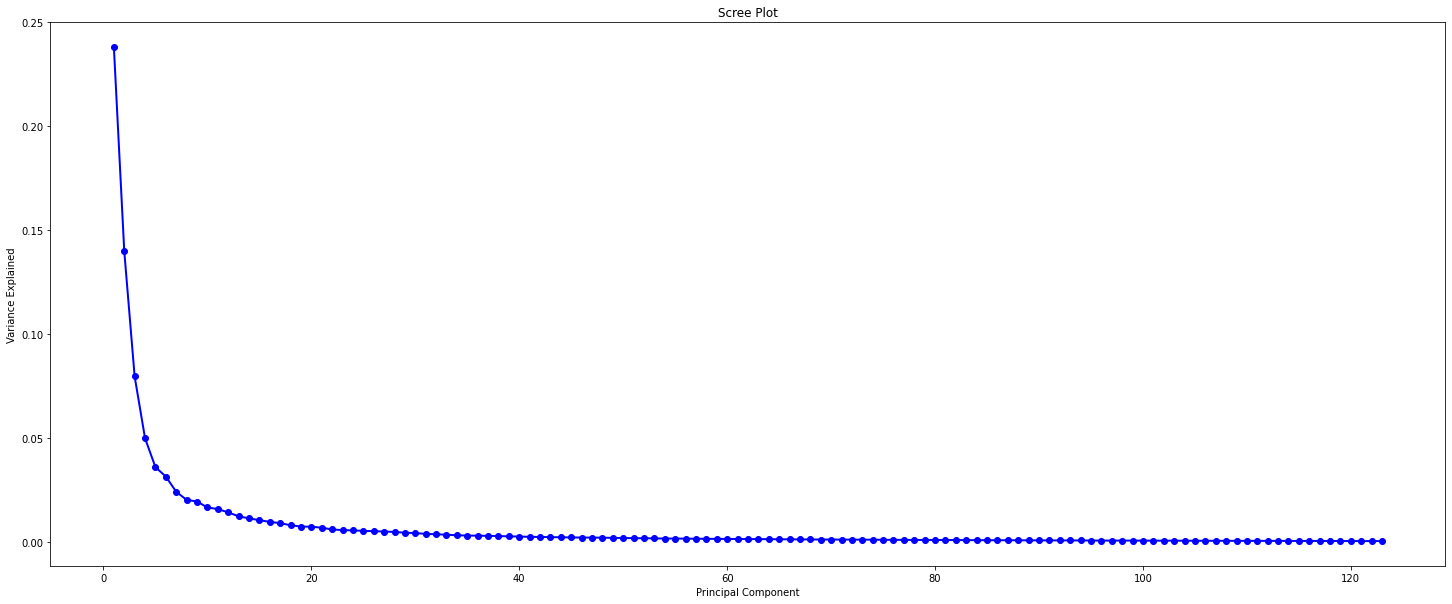

In [13]:
scree_plot(pca)

<font face="Times New Roman" size=4><div dir=ltr>
### Eigenfaces: Principal Components Visualization (25 points)
Plot the mean face using your PCA model with <code>pca.mean_</code> attribute followed by a reshape to original dimensions. What is this mean vector?

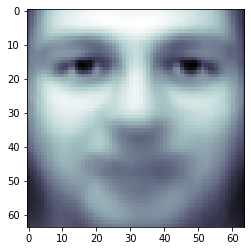

In [14]:
plt.imshow(
    pca.mean_.reshape(faces.images[0].shape),
    cmap=plt.cm.bone
)

> The mean vector per-feature empirical mean, estimated from the training set. In PCA at first all images are being subtracted from the mean at first.



<font face="Times New Roman" size=4><div dir=ltr>
Eigenfaces is the name given to a set of eigenvectors when used in the computer vision problem of human face recognition. Plot the 30 first eigenfaces sorted by their rank from the most important to the lowest. Can you explain what these faces indicate?

In [13]:
eigenfaces = pca.components_.reshape((n_components, h, w))

In [14]:
eigenfaces.shape

(103, 64, 64)

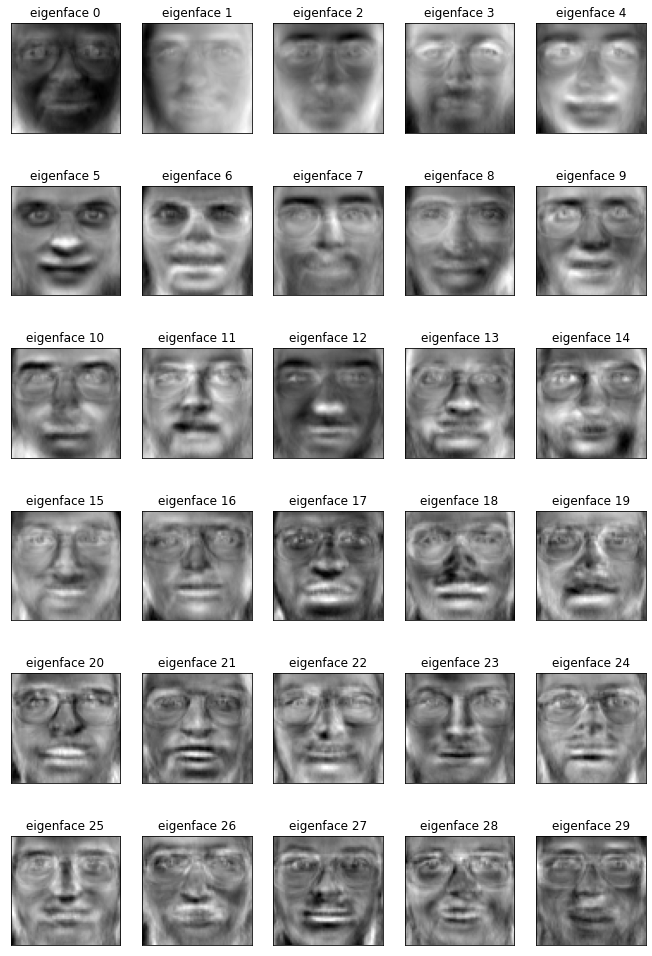

In [15]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_col=5, n_row=6)

> These faces indicate the eigenvectors which are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. Classification can be achieved by comparing how faces are represented by the basis set.

<font face="Times New Roman" size=4><div dir=ltr>
Transform your train and test sets to the new feature space using your PCA module. 

In [16]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

<font face="Times New Roman" size=4><div dir=ltr>
### Training your SVM Classifier (50 points)
Train an SVM classifier on the transformed dataset in the new feature space. You should use Grid Search Cross Validation or other validation techniques to obtain the best hyperparameters for your classifier. 

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

C_range = np.logspace(-3, 5, 9)         # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
gamma_range = np.logspace(-3, 5, 9)     # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
param_grid = dict(gamma=gamma_range, C=C_range)

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

grid.fit(X_train_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05])})

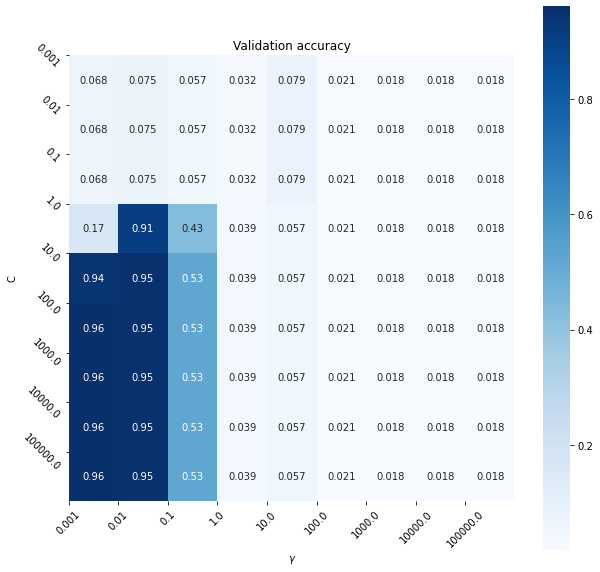

The best parameters are {'C': 100.0, 'gamma': 0.001} with a score of 0.96


In [18]:
import seaborn as sns

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))


plt.figure(figsize=(10, 10))
sns.heatmap(scores, annot=True, cmap='Blues', square=True);

plt.xlabel('$\gamma$')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range, rotation=-45)
plt.title('Validation accuracy')
plt.show()

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

In [19]:
svm_clf = SVC(C=100, gamma=0.001)
svm_clf.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.001)

<font face="Times New Roman" size=4><div dir=ltr>
After training your model, we can check its prediction on test samples. Run the following cell to check your model predictions with the target values on test samples. Predictions with red label indicate false classification of your model.

In [20]:
def plot_predicted(clf):
    fig = plt.figure(figsize=(15, 10))
    for i in range(30):
        ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(X_test[i].reshape(faces.images[0].shape),
                  cmap=plt.cm.bone)
        y_pred = clf.predict(X_test_pca[i, np.newaxis])[0] # X_test_new is the transformed X_test after PCA.
        color = ('black' if y_pred == y_test[i] else 'red')
        ax.set_title(y_pred, fontsize='small', color=color)

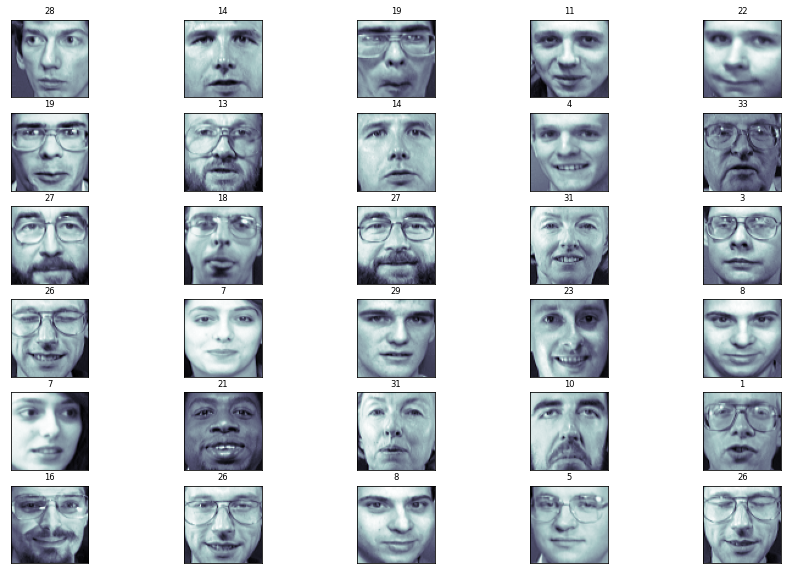

In [21]:
plot_predicted(svm_clf)

<font face="Times New Roman" size=4><div dir=ltr>
## Performance Measures
Let's evaluate your classifier to find out how good your model is.
    
    
### Precision Recall Tradeoff (20 points)
Plot the **DELETED: precision and recall versus the decision threshold** figure and precision vs recall figure.

In [22]:
from sklearn.preprocessing import label_binarize

# we should binarized the labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

In [23]:
from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score,
    PrecisionRecallDisplay
)


class PrecisionRecallIntersectionDisplay(PrecisionRecallDisplay):

    def plot(self, ax=None, name=None, **kwargs):
        dis = super().plot(ax=ax, name=name, **kwargs)
        
        xpoints = ypoints = (0, 1)
        dis.ax_.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, scalex=False, scaley=False)
        
        return dis

In [24]:
def plot_precision_recall_curve(X_test, y_test, y_score):
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(
        y_test.ravel(), y_score.ravel()
    )
    average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")
    
    display = PrecisionRecallIntersectionDisplay(
        recall=recall["micro"],
        precision=precision["micro"],
        average_precision=average_precision["micro"],
    )
    display.plot()
    _ = display.ax_.set_title("Micro-averaged over all classes")

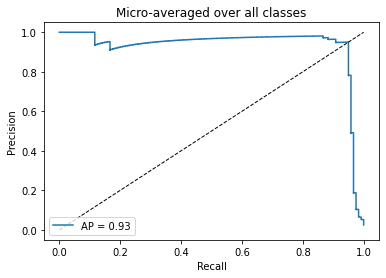

In [25]:
y_score = svm_clf.decision_function(X_test_pca)
plot_precision_recall_curve(X_test_pca, y_test_bin, y_score)

<font face="Times New Roman" size=4><div dir=ltr>
Then find the decision threshold, where the recall is equal to the precision. Write down it in the below cell:
    <br>
note: it should be apparent in the above figures.

decision_threshold = 0.93

recall at the above threshold = 0.93

<font face="Times New Roman" size=4><div dir=ltr>
### ROC/AUC (10 points)
Train a RandomForestClassifier with 30 estimators then plot a ROC curve, and calculate AUC for both randomForsetClassifier and your SVM classifier that you trained earlier, which one is the best by considering AUC indicator?


In [26]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=30)
rf_clf.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=30)

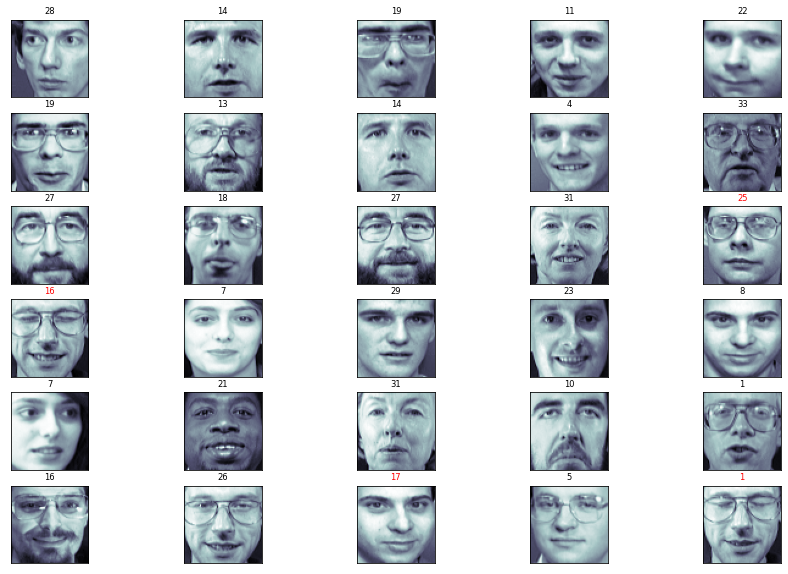

In [27]:
plot_predicted(rf_clf)

In [28]:
from sklearn.metrics import roc_curve, auc


def plot_roc_curve(X_test, y_test, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure()
    lw = 2
    plt.plot(
        fpr[2],
        tpr[2],
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc[2],
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

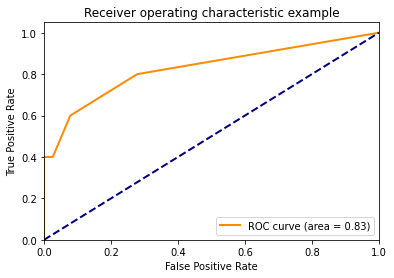

In [29]:
y_score = rf_clf.predict_proba(X_test_pca)
plot_roc_curve(X_test_pca, y_test_bin, y_score)

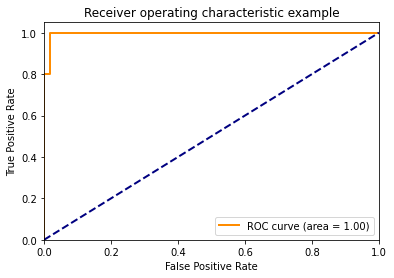

In [30]:
y_score = svm_clf.decision_function(X_test_pca)
plot_roc_curve(X_test_pca, y_test_bin, y_score)

> AUC for SVM: 1.0

> AUC for RandomForest: 0.83

> SVM is better considering the AUC score.

In [31]:
from yellowbrick.classifier import (
    ClassificationReport, 
    ConfusionMatrix
)

def show_classification_report(model, classes, X_train, y_train, X_test, y_test, **kwargs):
    vizualizer = ClassificationReport(model, classes=classes, support=True, **kwargs)
    vizualizer.fit(X_train, y_train)
    vizualizer.score(X_test, y_test)
    vizualizer.show()


def show_conf_matrix(model, classes, X_train, y_train, X_test, y_test, **kwargs):
    visualizer = ConfusionMatrix(model, classes=classes, percent=True, **kwargs)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

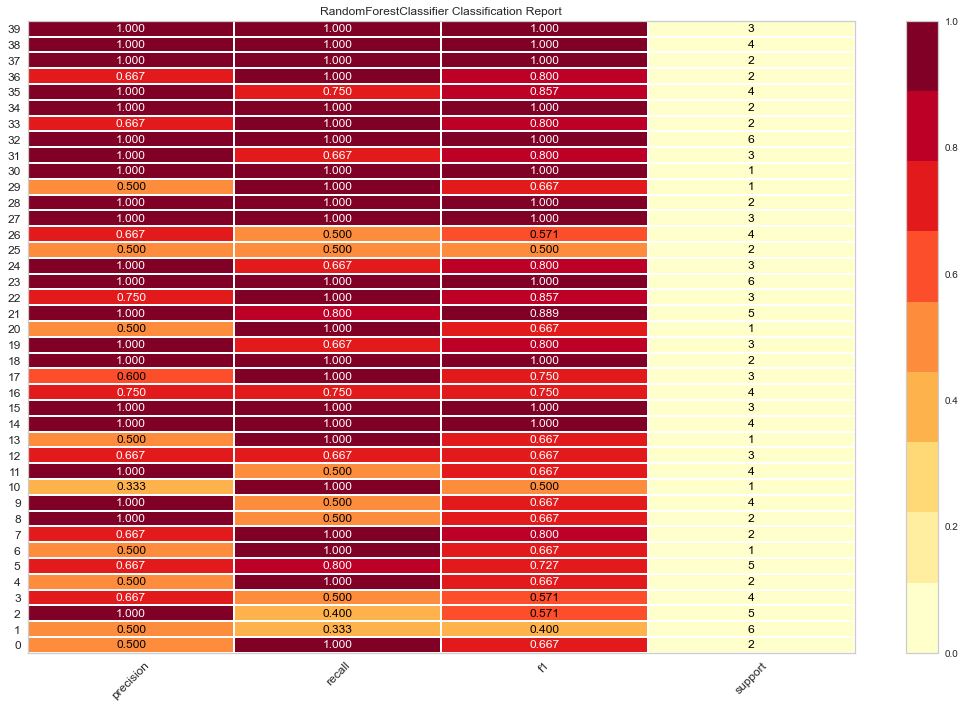

In [32]:
show_classification_report(rf_clf, rf_clf.classes_, X_train_pca, y_train, X_test_pca, y_test, size=(1080, 720))

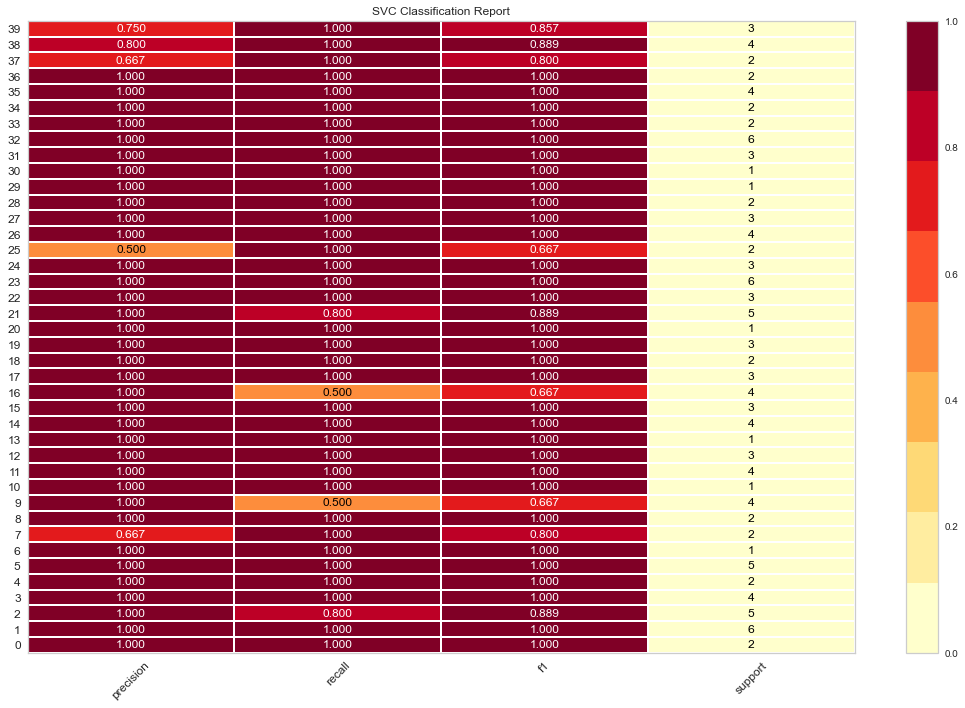

In [33]:
show_classification_report(svm_clf, rf_clf.classes_, X_train_pca, y_train, X_test_pca, y_test, size=(1080, 720))

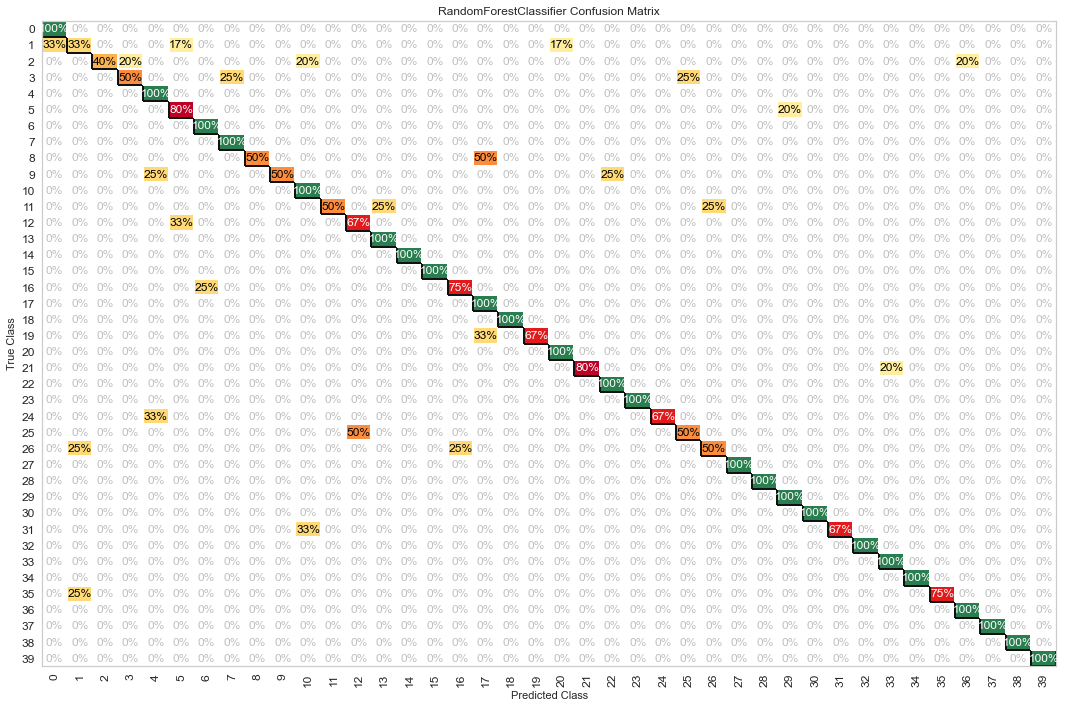

In [34]:
show_conf_matrix(rf_clf, rf_clf.classes_, X_train_pca, y_train, X_test_pca, y_test, size=(1080, 720))

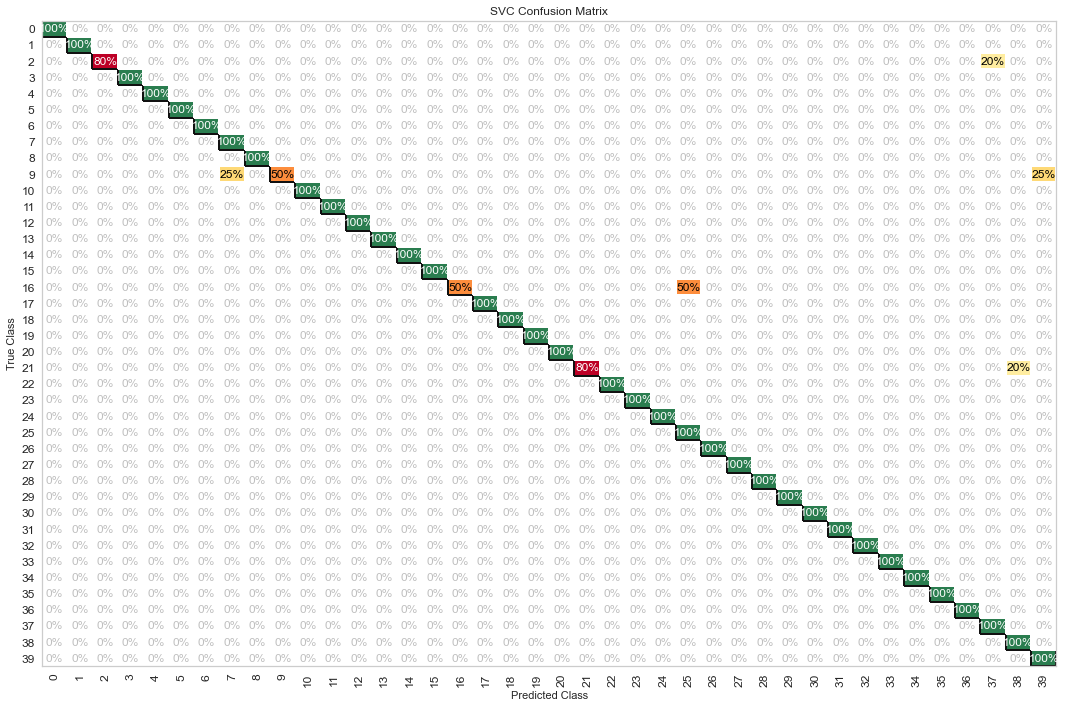

In [35]:
show_conf_matrix(svm_clf, svm_clf.classes_, X_train_pca, y_train, X_test_pca, y_test, size=(1080, 720))

<font face="Times New Roman" size=4><div dir=ltr>
### Classification Report (5 points)
Use the <code>classification_report</code> to describe the performance of your SVM model with different metrics. Explain your results and compare the predictions of model on different classes in few sentences.

In [36]:
from sklearn.metrics import classification_report

y_pred = svm_clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         6
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         1
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         4
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         3
          16       1.00      0.50      0.67         4
          17       1.00    

for almost all classes precision and recall are equal to 1. for some classes like 25 precision is not as good as others. For some like 16 recall is not good as others. Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned). So for example is class 25 it has returned all relevant results with some irrelevant ones. On the class 16 it has returned just the relevants ones but not all of them.

At the end we can say that the average result of the model is good.

<font face="Times New Roman" size=4><div dir=ltr>
### Confusion Matrix (15 points)
Plot the confusion matrix of the classifier's predictions.
Let’s focus on the errors of the plot. Divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute number of errors, then plot the result.

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = svm_clf.predict(X_test_pca)
conf_mx = confusion_matrix(y_test, y_pred)

In [38]:
conf_mx

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 3]], dtype=int64)

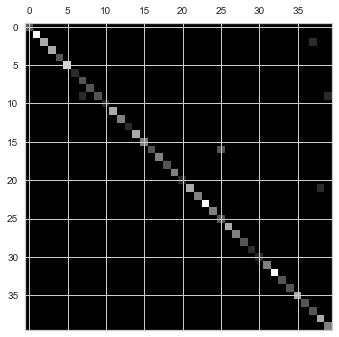

In [39]:
# after calculating confusion matrix, visualize it using below code

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

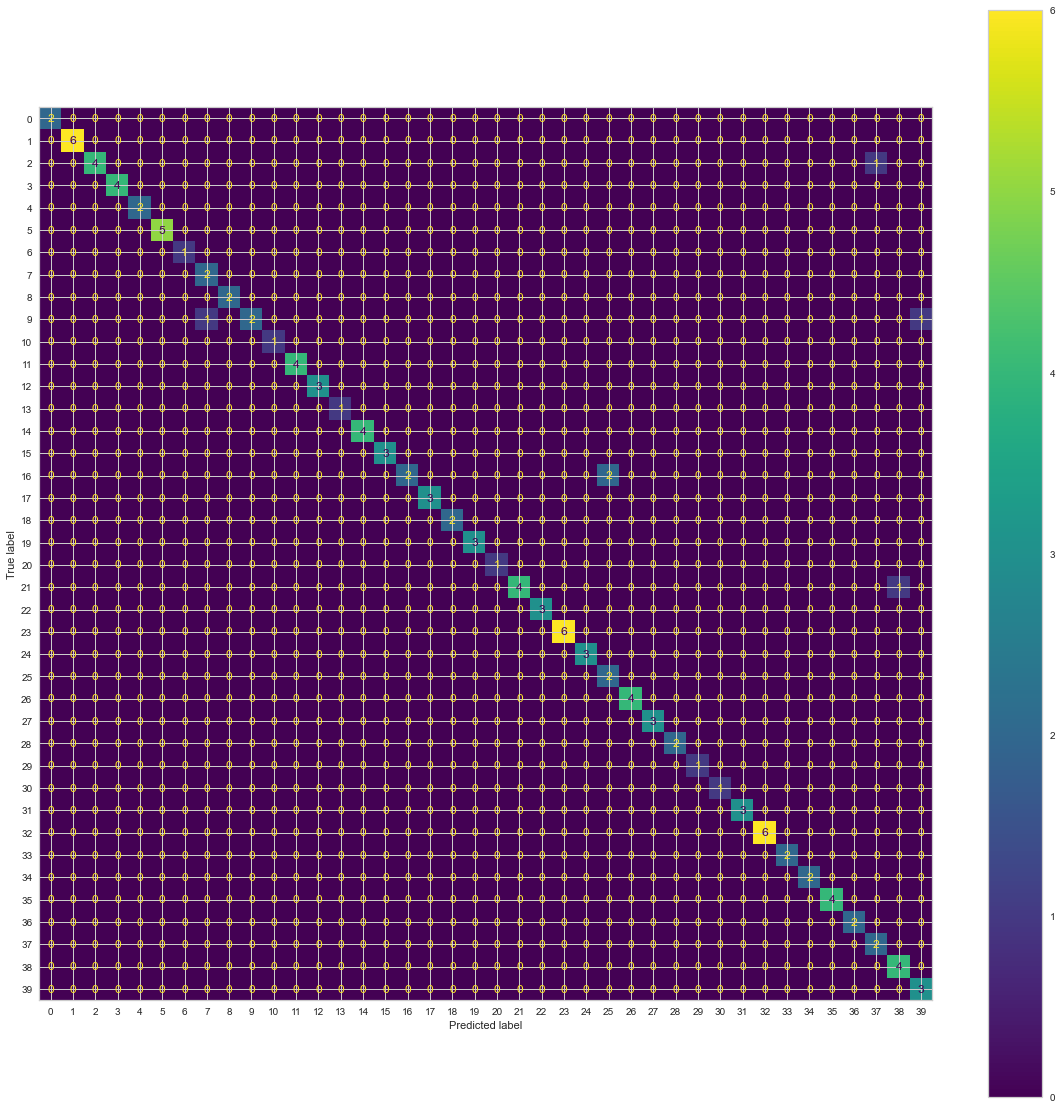

In [40]:
fig, ax = plt.subplots(figsize=(20, 20))
disp = ConfusionMatrixDisplay(conf_mx)
disp.plot(ax=ax)

In [41]:
norm_conf_mx = np.nan_to_num(conf_mx.astype("float") / conf_mx.sum(axis=1)[:, np.newaxis])
norm_conf_mx

array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.8, ..., 0.2, 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

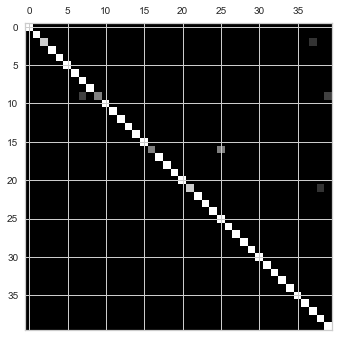

In [42]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

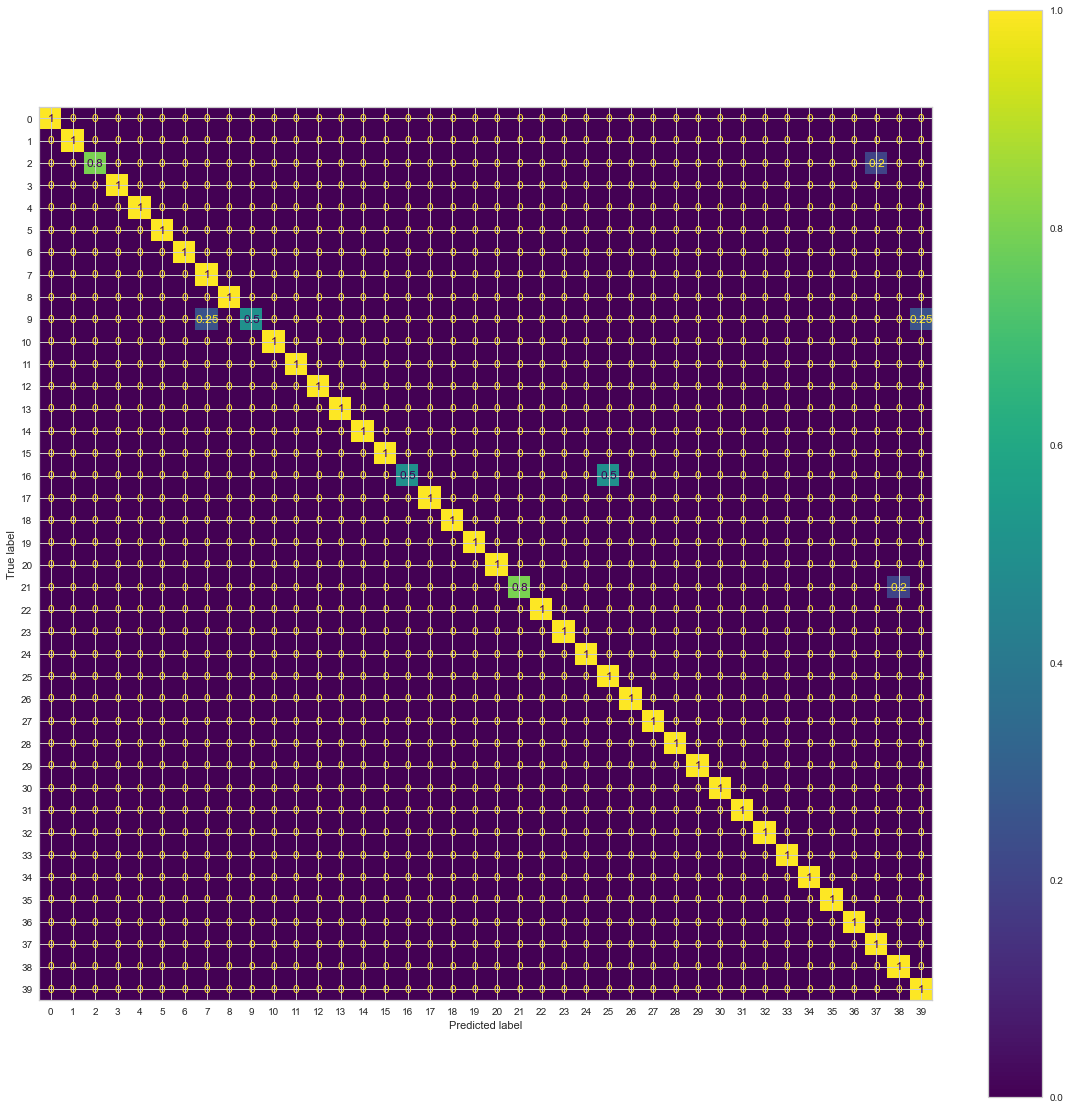

In [43]:
fig, ax = plt.subplots(figsize=(20, 20))
disp = ConfusionMatrixDisplay(norm_conf_mx)
disp.plot(ax=ax)